## 使用pyhanlp创建词云

去年我曾经写过一篇文章[Python + wordcloud + jieba 十分钟学会用任意中文文本生成词云](https://blog.csdn.net/fontthrone/article/details/72782971)（你可能觉得这和wordcloud中官方文档中的中文词云的例子代码很像，不要误会，那个也是我写的）

现在我们可以仿照之前的格式在写一份pyhanlp版本的。

对于wordcloud而言，因为原生支持的英文是自带空格的，所以我们这里需要的是进行分词和去停处理，然后将文本变为我们需要的list格式，输入wordcloud。同时因为文档中可能有新的词汇我们之前并没有发现，所以有必要的话。我们还需要进行添加自定义词典的代码。其代码时非常简单的。


首先对于添加自定义词典我们只需要，引用CustomDictionary类即可，代码如下。
```python
    CustomDictionary = JClass("com.hankcs.hanlp.dictionary.CustomDictionary")
    for word in userdict_list:
        CustomDictionary.add(word)
```

不过为了更好的发现新词我们还是采用一款发现新词比较好的分词器，比如默认的维特比，或者CRF。考虑到之前实验中CRF在默认的命名实体识别条件下，表现并不好，或许维特比才是更好的选择。


```python
    mywordlist = []    
    HanLP.Config.ShowTermNature = False
    CRFnewSegment = HanLP.newSegment("viterbi")
```

去停功能同样十分简单，我们还是利用之前在分词中提到的方法，不过这次我们把代码更pythoic一些

```python
        CoreStopWordDictionary = JClass("com.hankcs.hanlp.dictionary.stopword.CoreStopWordDictionary")
        text_list = CRFnewSegment.seg(text)
        CoreStopWordDictionary.apply(text_list)
        fianlText = [i.word for i in text_list]
```

而是否采用之前文章中的停词功能则可以自主选择，而处理为wordcloud所需要的格式，我们则直接采用之前的代码即可。最终核心部分代码如下：


```python


    CustomDictionary = JClass("com.hankcs.hanlp.dictionary.CustomDictionary")
    for word in userdict_list:
        CustomDictionary.add(word)

    mywordlist = []    
    HanLP.Config.ShowTermNature = False
    CRFnewSegment = HanLP.newSegment("viterbi")
    
    fianlText = []
    if isUseStopwordsOfHanLP == True:
        CoreStopWordDictionary = JClass("com.hankcs.hanlp.dictionary.stopword.CoreStopWordDictionary")
        text_list = CRFnewSegment.seg(text)
        CoreStopWordDictionary.apply(text_list)
        fianlText = [i.word for i in text_list]
    else:
        fianlText = list(CRFnewSegment.segment(text))
    liststr = "/ ".join(fianlText)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)

```

### 最终实例

现在我们得到了最终实例，已经可以运行了，关于该部分，你还可以参考我fork的wordcloud项目，还有相比于此处新的变化。那里提供了[一个jieba和pyhanlp合并的版本](https://github.com/FontTian/word_cloud/blob/master/examples/wordcloud_cn.py)。

/home/fonttian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


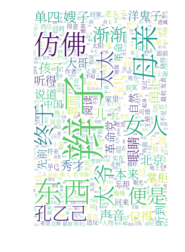

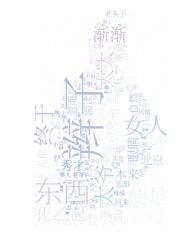

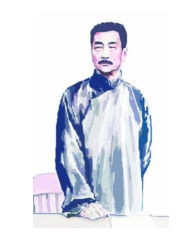

In [2]:
# - * - coding: utf - 8 -*-
"""
create wordcloud with chinese
=======================

Wordcloud is a very good tools, but if you want to create
Chinese wordcloud only wordcloud is not enough. The file
shows how to use wordcloud with Chinese. First, you need a
Chinese word segmentation library pyhanlp, pyhanlp is One of 
the most powerful natural language processing libraries in Chinese
today, and it's extremely easy to use.You can use 'PIP install pyhanlp'. 
To install it. 

Its level of identity of named entity,word segmentation was better than jieba,
and has more ways to do it
"""

from os import path
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from pyhanlp import *
%matplotlib inline

# d = path.dirname(__file__)
d = "/home/fonttian/Github/word_cloud/examples"

stopwords_path = d + '/wc_cn/stopwords_cn_en.txt'
# Chinese fonts must be set
font_path = d + '/fonts/SourceHanSerif/SourceHanSerifK-Light.otf'

# the path to save worldcloud
imgname1 = d + '/wc_cn/LuXun.jpg'
imgname2 = d + '/wc_cn/LuXun_colored.jpg'
# read the mask / color image taken from
back_coloring = imread(path.join(d, d + '/wc_cn/LuXun_color.jpg'))

# Read the whole text.
text = open(path.join(d, d + '/wc_cn/CalltoArms.txt')).read()

# 
userdict_list = ['孔乙己']


# The function for processing text with HaanLP
def pyhanlp_processing_txt(text,isUseStopwordsOfHanLP = True):
    CustomDictionary = JClass("com.hankcs.hanlp.dictionary.CustomDictionary")
    for word in userdict_list:
        CustomDictionary.add(word)

    mywordlist = []    
    HanLP.Config.ShowTermNature = False
    CRFnewSegment = HanLP.newSegment("viterbi")
    
    fianlText = []
    if isUseStopwordsOfHanLP == True:
        CoreStopWordDictionary = JClass("com.hankcs.hanlp.dictionary.stopword.CoreStopWordDictionary")
        text_list = CRFnewSegment.seg(text)
        CoreStopWordDictionary.apply(text_list)
        fianlText = [i.word for i in text_list]
    else:
        fianlText = list(CRFnewSegment.segment(text))
    liststr = "/ ".join(fianlText)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)


wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, mask=back_coloring,
               max_font_size=100, random_state=42, width=1000, height=860, margin=2,)


pyhanlp_processing_txt = pyhanlp_processing_txt(text,isUseStopwordsOfHanLP = True)

wc.generate(pyhanlp_processing_txt)

# create coloring from image
image_colors_default = ImageColorGenerator(back_coloring)

plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname1))

# create coloring from image
image_colors_byImg = ImageColorGenerator(back_coloring)

# show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors_byImg), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(back_coloring, interpolation="bilinear")
plt.axis("off")
plt.show()

# save wordcloud
wc.to_file(path.join(d, imgname2))